#Part A - Rank the Players
Who is the best player in the world according to your analysis?

Use data from FIFA 19. Predict the Overall (OVR ) skill Statistic for players in the FIFA 20 Edition. Train on all players from FIFA 19

Graphically represent the Overall data for the players in test set (see below)

Instructions :

Sofifa Id, URL, Name, Potential, Real face, URL variables cannot be used during the prediction or learning.

In case of a change in playing position, alter FIFA 20 position to match FIFA 19 Position

The final score will be assigned using MSE.

Test Set: Players from the following Clubs

FC Barcelona

FC Bayern München

Real Madrid

Paris Saint-Germain

Juventus

Manchester City

Liverpool FC

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge

In [131]:
df = pd.read_csv("players_19.csv")


In [132]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,1985-02-05,187,83,Portugal,Juventus,94,94,77000000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,127100000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,81.0,89.0,35.0,79.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,31,1987-06-24,170,72,Argentina,FC Barcelona,94,94,110500000,565000,"CF, RW, ST",Left,5,4,4,Medium/Medium,Messi,Yes,226500000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",RW,10.0,NaN,2004-07-01,2021.0,CF,10.0,88.0,91.0,88.0,96.0,32.0,61.0,NaN,NaN,NaN,...,48,22,94,94,75,96,33,28,26,6,11,15,14,8,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,90+2,84+2,84+2,84+2,90+2,63+2,61+2,61+2,61+2,63+2,58+2,47+2,47+2,47+2,58+2
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,26,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,93,118500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,228100000.0,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,92.0,84.0,83.0,95.0,32.0,59.0,NaN,NaN,NaN,...,56,36,89,87,81,94,27,24,33,9,9,15,15,11,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,193080,https://sofifa.com/player/193080/david-de-gea-...,De Gea,David De Gea Quintana,27,1990-11-07,193,76,Spain,Manchester United,91,93,72000000,260000,GK,Right,4,3,1,Medium/Medium,Lean,Yes,138600000.0,NaN,GK,1.0,NaN,2011-07-01,2019.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,87.0,...,38,30,12,68,40,68,15,21,13,90,85,87,88,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,27,1991-06-28,181,70,Belgium,Manchester City,91,92,102000000,355000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,196400000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,77.0,86.0,92.0,87.0,60.0,78.0,NaN,NaN,NaN,...,76,60,87,94,79,88,67,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


# Columns in Dataset

In [133]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

# EDA

In [134]:
# First we will analyse a few of the features
df1=df[['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'body_type', 'real_face',
       'release_clause_eur']]

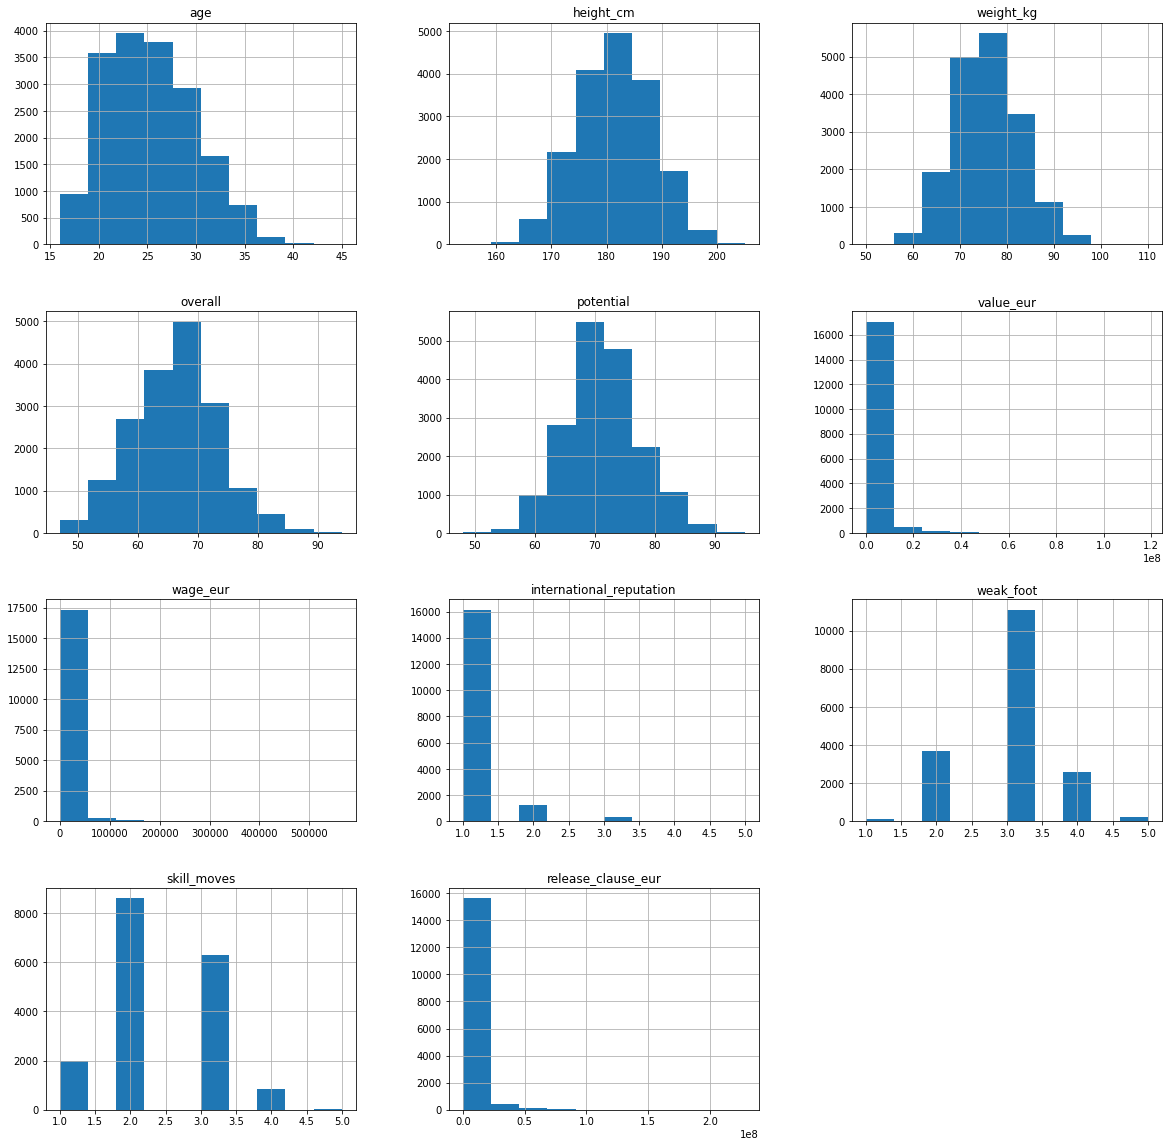

In [135]:
df1.hist(figsize = (20,20))
plt.show()


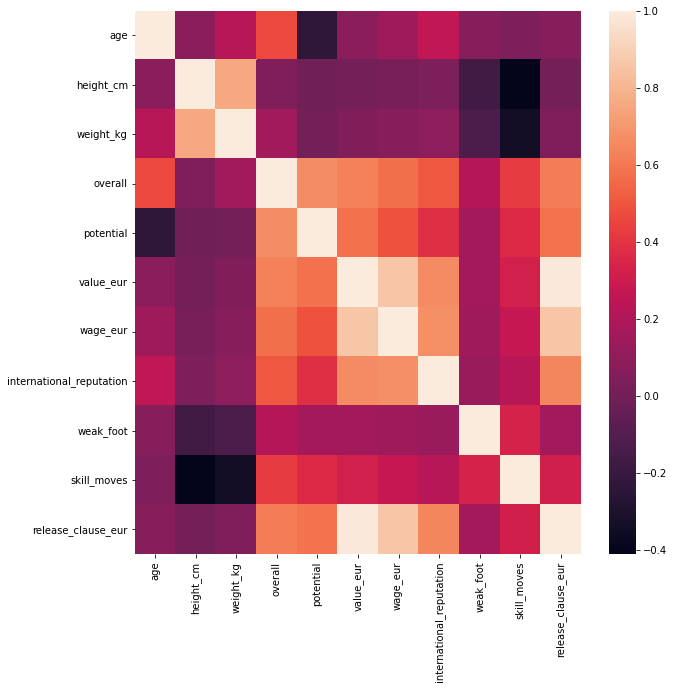

In [200]:
fig , ax = plt.subplots(figsize = (10,10))
correlation = df1.corr()
sns.heatmap(correlation)

***Effect of Age on Overall Rating***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



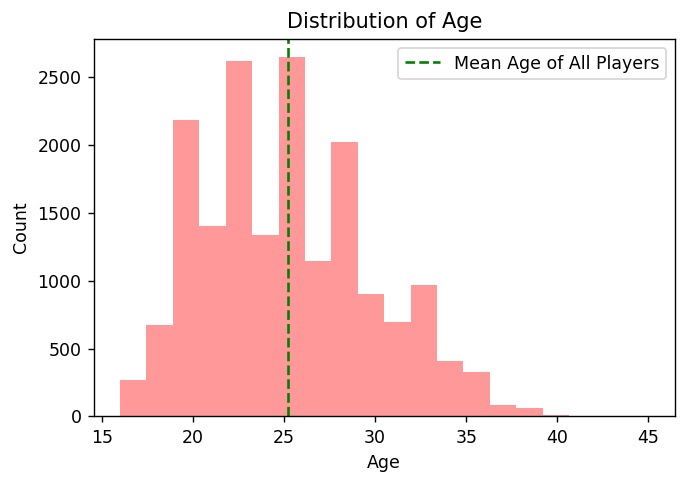

In [137]:
plt.figure(dpi=125)
sns.distplot(a=df1['age'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(df['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

Let's see number of players as per Nationality

In [138]:
print("The age of the youngest player : ", int(df["age"].min()))
print("The age of the oldest player : ", int(df["age"].max()))

The age of the youngest player :  16
The age of the oldest player :  45


In [139]:
counts_Nationality = df1["nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
top10= counts_Nationality.iloc[0:10,:]
print(top10)

         index  nationality
0      England         1656
1      Germany         1191
2        Spain         1037
3    Argentina          943
4       France          892
5       Brazil          816
6        Italy          744
7     Colombia          588
8        Japan          455
9  Netherlands          418


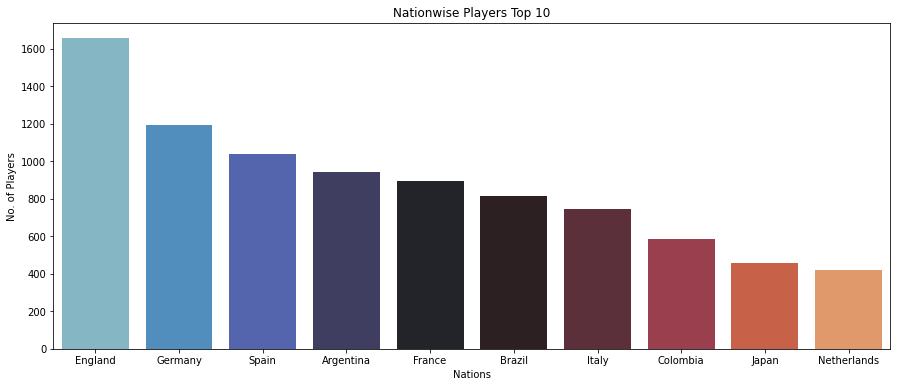

In [140]:
fig , ax = plt.subplots( figsize = (15 , 6))
fig = sns.barplot(x="index", y="nationality",data= top10,palette = "icefire")
plt.title('Nationwise Players Top 10')
fig.set(xlabel='Nations', ylabel='No. of Players')
plt.show(fig)

The Dataset has most number of players from England , Germany , Spain 

In [141]:
fig = px.pie(df1.head(50),names='nationality',title='Percentage of Nations of the Top 50 FIFA Players')
fig.show()

Thus, highest number of players are from ***Spain*** and ***France***.

**Country with max count of Top 20 players**

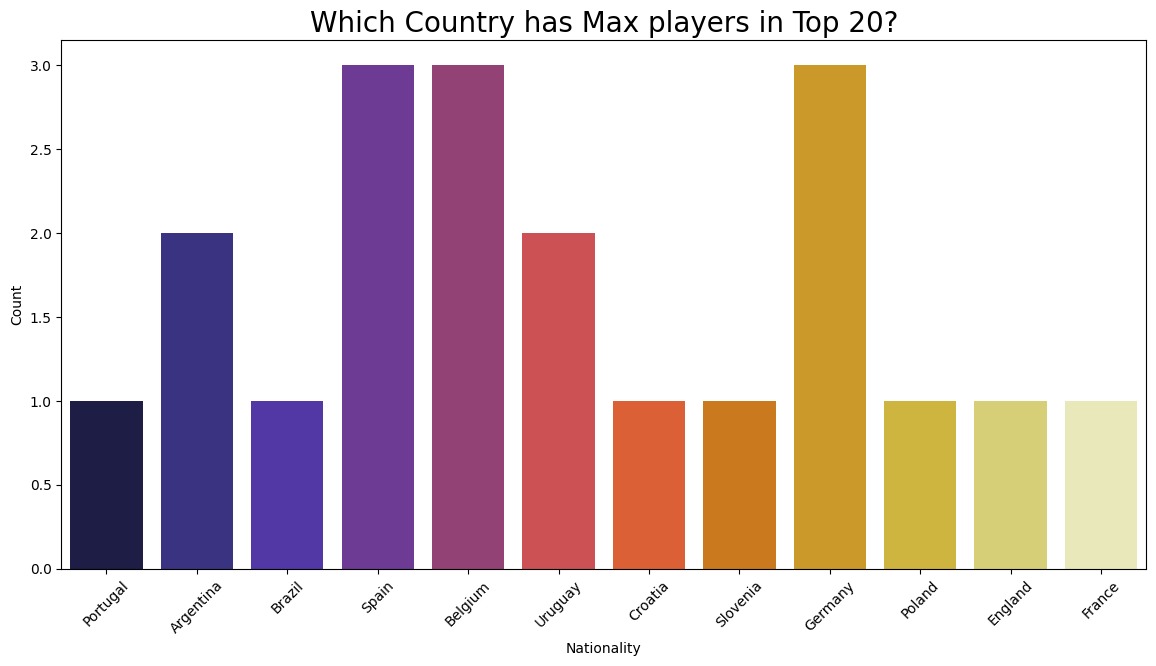

In [142]:
plt.figure(figsize=(14,7),dpi=100)
sns.countplot(x='nationality',data=df1.head(20),palette='CMRmap')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Country has Max players in Top 20?',fontsize = 20)
plt.show()

*Spain,Belgium and Germany* has same and highest number of players in Top 10

In [143]:
fig = px.pie(df1.head(50),names='club',title='Percentage of Clubs among the Top 50 FIFA Players')
fig.show()

Thus, **FC Barcelona** has the highest representation among the top 50 FIFA players.

Club having max players in top 20

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



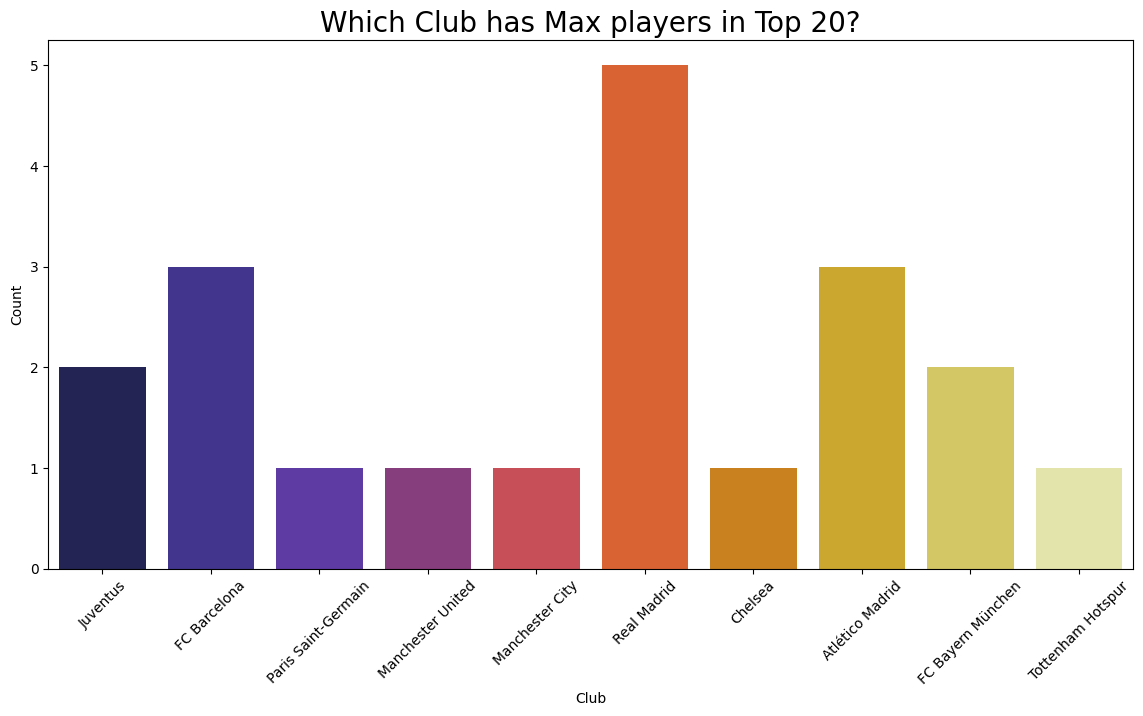

In [144]:
plt.figure(figsize=(14,7),dpi=100)
sns.countplot('club',data=df1.head(20),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Which Club has Max players in Top 20?',fontsize = 20)
plt.show()

Thus, **Real Madrid**  has highest number of players in top 20

Preffered foot while playing

In [145]:
plt.figure(dpi = 120)
fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Histogram(histfunc="count",  x=df1["preferred_foot"]),row=1, col=1)
fig.show()
px.pie(df1,'preferred_foot')

<Figure size 720x480 with 0 Axes>

Thus, most of the players prefer **right** foot for playing.

**Comparision of Potential of top 10 players**

In [146]:
fig = px.bar(df1.head(10), y='potential',x='short_name',color='age',
             labels={'Overall Rating v Nation of Top 20'}, height=400)
fig.update_layout(title='Comparison of Potential of Top 10 FIFA Players',xaxis_title='Player Name',yaxis_title='Potential')
fig.show()

Thus, ***Cristiano Ronaldo*** is the best player as per potential

**Comparing Wagers as per Nationality**

In [147]:
overall_wage = df1.groupby("nationality", as_index=False)["wage_eur","overall"].mean()
overall_wage.sort_values(by="wage_eur",inplace=True,ascending=False)
overall_wage.head()
topwage10 = overall_wage.iloc[0:5,:]
print(topwage10)

              nationality      wage_eur    overall
40     Dominican Republic  52000.000000  73.000000
152  United Arab Emirates  36000.000000  76.000000
6                 Armenia  31571.428571  69.571429
53                  Gabon  24533.333333  70.200000
33                Croatia  21753.968254  69.468254


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'Wages as per Nationality')

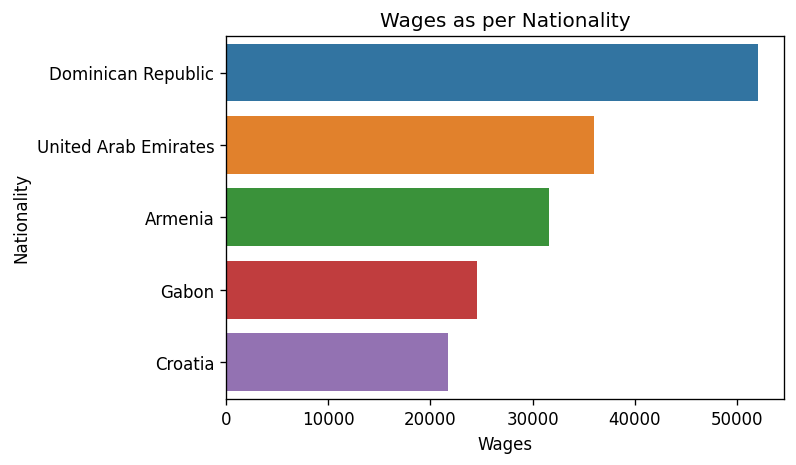

In [148]:
plt.figure(dpi=120)
fig_wage = sns.barplot(data = topwage10,y="nationality", x="wage_eur")
fig_wage.set(xlabel = "Wages", ylabel = "Nationality")
plt.title("Wages as per Nationality")

Thus, **Armenia** has the highest wage.

Let's list out the top 10 players by potential.


In [149]:
df1.sort_values("potential", axis = 0, ascending = False)[['short_name', 'club','potential', 'overall','value_eur']].head(10)

,short_name,club,potential,overall,value_eur
41,K. Mbappé,Paris Saint-Germain,95,87,72000000
0,Cristiano Ronaldo,Juventus,94,94,77000000
1,L. Messi,FC Barcelona,94,94,110500000
15,P. Dybala,Juventus,94,89,89000000
2,Neymar Jr,Paris Saint-Germain,93,92,118500000
3,De Gea,Manchester United,93,91,72000000
56,L. Sané,Manchester City,93,86,62500000
214,G. Donnarumma,Milan,93,82,29000000
78,Marco Asensio,Real Madrid,93,85,56500000
9,J. Oblak,Atlético Madrid,93,90,68000000


In [150]:
fig = go.Figure(data=go.Scatter(x=df1['overall'],y=df1['value_eur'],mode='markers',marker=dict(size=10,color=df1['age'],showscale=True),text=df1['short_name']))
fig.update_layout(title='Scatter Plot for Overall Rating v Value in Euros',xaxis_title='Overall Rating',yaxis_title='Value in Euros')

fig.show()

Thus, **Neymar Jr.** is the player with the highest value of ***118.5M***.

In [151]:
fig = go.Figure(data=go.Scatter(x=df1['potential'],y=df1['wage_eur'],mode='markers',marker=dict(size=10,color=df1['age'],showscale=True),text=df1['short_name']))
fig.update_layout(title='Scatter Plot for Potential Rating v Wage in Euros',xaxis_title='Potential Rating',yaxis_title='Wage in Euros')
fig.show()

Thus, ***L. Messi*** is the highest paid footballer of all time.

Lets plot effect of age on overall rating

Text(0.5, 1.0, 'Age vs Overall')

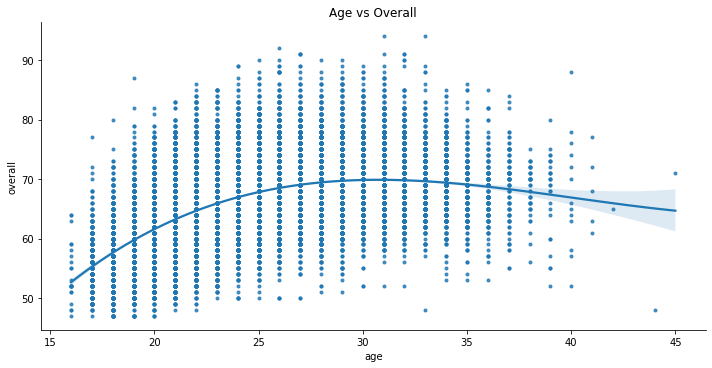

In [152]:
sns.lmplot(x = "age", y = "overall", data = df1,markers=".",order = 3,palette="pastel",aspect = 2)
plt.title("Age vs Overall")

Text(0.5, 1.0, 'Comparision between Age and Stats')

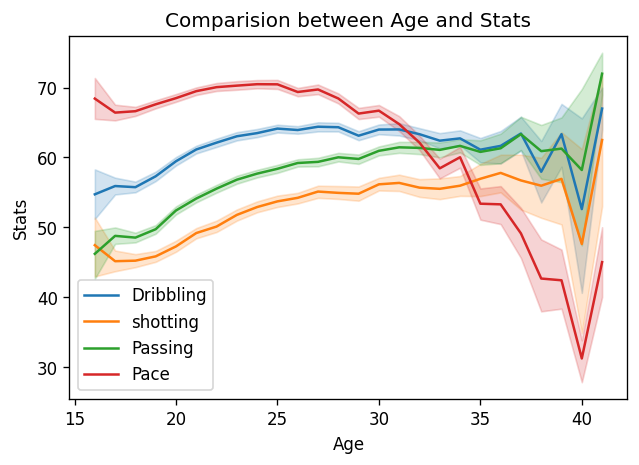

In [153]:
plt.figure(dpi = 120)
sns.lineplot(x = "age", y = "dribbling", data = df,label = "Dribbling")
sns.lineplot(x = "age", y = "shooting", data = df,label = "shotting")
sns.lineplot(x = "age", y = "passing", data = df,label = "Passing")
sns.lineplot(x = "age", y = "pace", data = df,label = "Pace")
plt.xlabel("Age")
plt.ylabel("Stats")
plt.title("Comparision between Age and Stats")

Text(0.5, 1.0, 'Which age belongs to Max players in Top 20?')

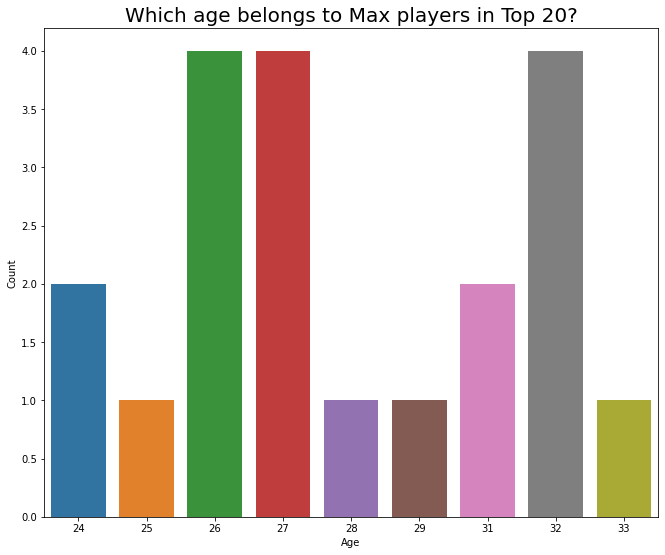

In [154]:
plt.figure(figsize=(11,9))
sns.countplot(x = "age",data = df1.head(20))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20?',fontsize = 20)



*  max age of player= **45**, min age of players= **16**
*   the age **25,27,32** belongs to the max players in top 20

*  overall rating increases with age
*  features like stamina, passing, dribbling, pace increases till certain age after which it goes down.








***Effect of height on overall rating***

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



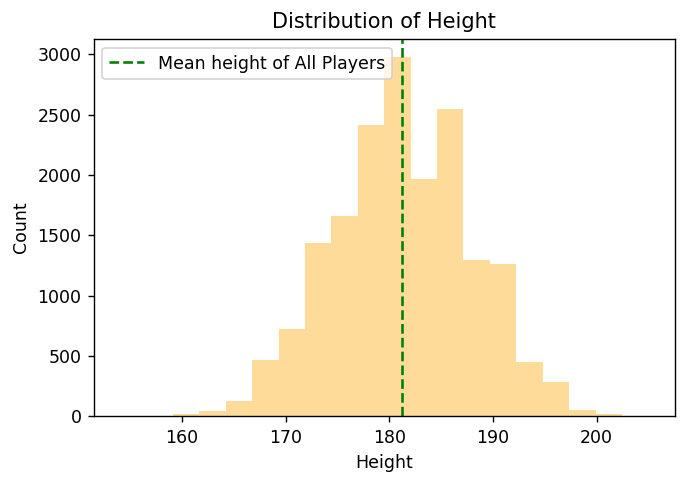

In [155]:
plt.figure(dpi=125)
sns.distplot(a=df1['height_cm'],kde=False,bins=20,color = "orange")
plt.axvline(x=np.mean(df1['height_cm']),c='green',ls='--',label='Mean height of All Players')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

In [156]:
print(list(df1.loc[df['height_cm'] == df1['height_cm'].min()]['short_name'])[0],'is the shortest player of height',df1['height_cm'].min(),' cm')
print(list(df.loc[df1['height_cm'] == df1['height_cm'].max()]['short_name'])[0],'is the tallest player of height',df1['height_cm'].max(),' cm')

M. Garuch is the shortest player of height 154  cm
T. Holý is the tallest player of height 205  cm


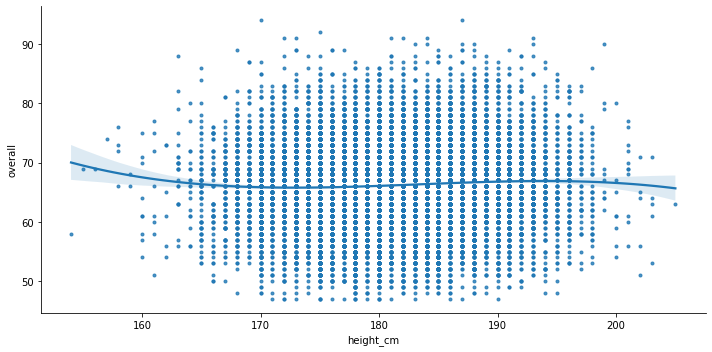

In [157]:
sns.lmplot(x="height_cm", y="overall",data=df,markers=".",
           order=3,aspect=2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



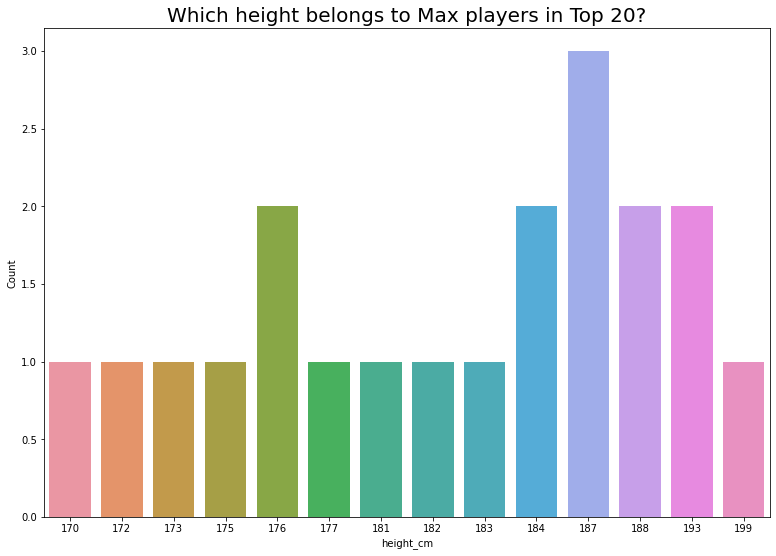

In [158]:
plt.figure(figsize=(13,9))
sns.countplot('height_cm',data=df1.head(20))
plt.xlabel('height_cm')
plt.ylabel('Count')
plt.title('Which height belongs to Max players in Top 20?',fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Comparision between Height and Stats')

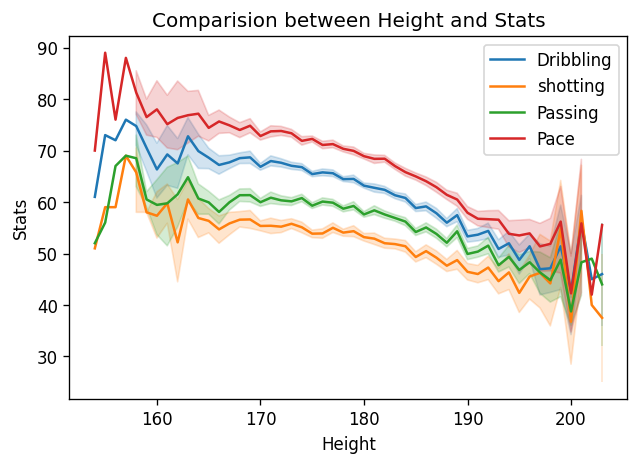

In [159]:
plt.figure(dpi = 120)
sns.lineplot(x = "height_cm", y = "dribbling", data = df,label = "Dribbling")
sns.lineplot(x = "height_cm", y = "shooting", data = df,label = "shotting")
sns.lineplot(x = "height_cm", y = "passing", data = df,label = "Passing")
sns.lineplot(x = "height_cm", y = "pace", data = df,label = "Pace")
plt.xlabel("Height")
plt.ylabel("Stats")
plt.title("Comparision between Height and Stats")

**Observations-**

*   M. Moralez is the shortest player of height 158 cm
*   L. Kalinić is the tallest player of height 201 cm
*   overall rating is not affected by height
*   the height 187 cm belongs to the max players in top 20
*   As height increases, features like stamina, dribbling, pace, passing decreases.





# Creating a Predictive Model


Data Preprocessing

In [160]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 104 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   sofifa_id                   int64  
 1   player_url                  object 
 2   short_name                  object 
 3   long_name                   object 
 4   age                         int64  
 5   dob                         object 
 6   height_cm                   int64  
 7   weight_kg                   int64  
 8   nationality                 object 
 9   club                        object 
 10  overall                     int64  
 11  potential                   int64  
 12  value_eur                   int64  
 13  wage_eur                    int64  
 14  player_positions            object 
 15  preferred_foot              object 
 16  international_reputation    int64  
 17  weak_foot                   int64  
 18  skill_moves                 int64  
 19  work_rate               

Here in the dataset the columns that have Nan values are treated as object type. So we need to do Nan imputation 1st and then do further analysis

In [161]:
df.shape

(17770, 104)

There are 104 columns and 17770 rows which implies theat the data for 17770 players is available in the dataset

In [162]:
df['pace'].fillna(value=0,inplace=True)
df['shooting'].fillna(value=0,inplace=True)
df['passing'].fillna(value=0,inplace=True)
df['dribbling'].fillna(value=0,inplace=True)
df['defending'].fillna(value=0,inplace=True)
df['physic'].fillna(value=0,inplace=True)
df['gk_diving'].fillna(value=0,inplace=True)
df['gk_handling'].fillna(value=0,inplace=True)
df['gk_kicking'].fillna(value=0,inplace=True)
df['gk_reflexes'].fillna(value=0,inplace=True)
df['gk_speed'].fillna(value=0,inplace=True)
df['gk_positioning'].fillna(value=0,inplace=True)
df['team_position'].replace(np.NaN,'SUB',inplace=True)
df['nation_position'].replace(np.NaN,'SUB',inplace = True)

In [163]:
# Useful Columns
fill_null = ['sofifa_id','short_name', 'long_name', 'age',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','skill_moves','height_cm', 'weight_kg' , 'player_positions' , 'overall']

In [164]:
df_train = df[fill_null]

In [165]:
df_train.tail()

,sofifa_id,short_name,long_name,age,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_moves,height_cm,weight_kg,player_positions,overall
17765,238985,P. Phillips,Pierce Phillips,19,52.0,32.0,46.0,45.0,46.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,31,26,49,55,31,44,30,31,50,41,55,49,51,53,65,46,60,44,49,28,51,49,31,51,40,35,41,44,53,11,6,13,11,8,2,180,72,"CM, CDM",47
17766,240160,A. Kaltner,Alexander Kaltner,18,64.0,43.0,40.0,52.0,23.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,37,48,30,45,43,50,41,38,30,51,62,66,67,39,70,38,81,55,60,35,28,25,43,41,48,37,28,15,22,15,5,14,12,8,2,178,75,ST,47
17767,241304,Ma Junliang,马俊亮,20,81.0,35.0,47.0,49.0,44.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,40,27,45,58,35,46,39,37,47,42,84,78,78,45,70,48,59,58,45,35,58,41,48,40,36,39,54,37,40,5,12,14,14,11,2,181,64,CM,47
17768,240158,C. Ehlich,Christoph Ehlich,19,63.0,42.0,38.0,50.0,41.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,39,40,45,46,42,46,35,29,22,49,65,62,68,44,70,44,69,61,59,41,38,36,44,38,47,47,40,42,42,13,12,11,15,12,2,179,73,RB,47
17769,243961,E. Tweed,Evan Tweed,19,56.0,36.0,46.0,44.0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,37,34,49,55,27,40,31,30,46,43,59,54,54,53,66,47,64,44,50,30,52,45,35,49,40,43,39,39,48,6,11,9,5,8,2,180,72,CM,47


In [166]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   17770 non-null  int64  
 1   short_name                  17770 non-null  object 
 2   long_name                   17770 non-null  object 
 3   age                         17770 non-null  int64  
 4   pace                        17770 non-null  float64
 5   shooting                    17770 non-null  float64
 6   passing                     17770 non-null  float64
 7   dribbling                   17770 non-null  float64
 8   defending                   17770 non-null  float64
 9   physic                      17770 non-null  float64
 10  gk_diving                   17770 non-null  float64
 11  gk_handling                 17770 non-null  float64
 12  gk_kicking                  17770 non-null  float64
 13  gk_reflexes                 177



*Splitting the column player position to get a single position



In [167]:
df_train['player_positions']= df['player_positions'].str.split(',', n = 1, expand = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
df_train.head()

,sofifa_id,short_name,long_name,age,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_moves,height_cm,weight_kg,player_positions,overall
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,33,90.0,93.0,81.0,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,5,187,83,ST,94
1,158023,L. Messi,Lionel Andrés Messi Cuccittini,31,88.0,91.0,88.0,96.0,32.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,77,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,4,170,72,CF,94
2,190871,Neymar Jr,Neymar da Silva Santos Junior,26,92.0,84.0,83.0,95.0,32.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,5,175,68,LW,92
3,193080,De Gea,David De Gea Quintana,27,0.0,0.0,0.0,0.0,0.0,0.0,90.0,85.0,87.0,94.0,58.0,88.0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,1,193,76,GK,91
4,192985,K. De Bruyne,Kevin De Bruyne,27,77.0,86.0,92.0,87.0,60.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,83,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,60,87,94,79,88,67,58,51,15,13,5,10,13,4,181,70,CAM,91


# Converting Object type data into float for the numerical columns

In [169]:
df_train['goalkeeping_positioning']= df_train['goalkeeping_positioning'].str.split('+', n = 1, expand = True)
df_train['goalkeeping_diving']= df_train['goalkeeping_diving'].str.split('+', n = 1, expand = True)
df_train['goalkeeping_handling']= df_train['goalkeeping_handling'].str.split('+', n = 1, expand = True)
df_train['goalkeeping_kicking']= df_train['goalkeeping_kicking'].str.split('+', n = 1, expand = True)
df_train['goalkeeping_reflexes']= df_train['goalkeeping_reflexes'].str.split('+', n = 1, expand = True)
df_train['attacking_crossing']= df_train['attacking_crossing'].str.split('+', n = 1, expand = True)
df_train['attacking_finishing']= df_train['attacking_finishing'].str.split('+', n = 1, expand = True)
df_train['attacking_heading_accuracy']= df_train['attacking_heading_accuracy'].str.split('+', n = 1, expand = True)
df_train['attacking_short_passing']= df_train['attacking_short_passing'].str.split('+', n = 1, expand = True)
df_train['attacking_volleys']= df_train['attacking_volleys'].str.split('+', n = 1, expand = True)
df_train['skill_ball_control']= df_train['skill_ball_control'].str.split('+', n = 1, expand = True)
df_train['skill_curve']= df_train['skill_curve'].str.split('+', n = 1, expand = True)
df_train['skill_dribbling']= df_train['skill_dribbling'].str.split('+', n = 1, expand = True)
df_train['skill_fk_accuracy']= df_train['skill_fk_accuracy'].str.split('+', n = 1, expand = True)
df_train['skill_long_passing']= df_train['skill_long_passing'].str.split('+', n = 1, expand = True)
#df_train['skill_moves']= df['skill_moves'].str.split('+', n = 1, expand = True)
df_train['movement_acceleration']= df_train['movement_acceleration'].str.split('+', n = 1, expand = True)
df_train['movement_agility']= df_train['movement_agility'].str.split('+', n = 1, expand = True)
df_train['movement_balance']= df_train['movement_balance'].str.split('+', n = 1, expand = True)
df_train['movement_reactions']= df_train['movement_reactions'].str.split('+', n = 1, expand = True)
df_train['movement_sprint_speed']= df_train['movement_sprint_speed'].str.split('+', n = 1, expand = True)
df_train['power_jumping']= df_train['power_jumping'].str.split('+', n = 1, expand = True)
df_train['power_long_shots']= df_train['power_long_shots'].str.split('+', n = 1, expand = True)
df_train['power_shot_power']= df_train['power_shot_power'].str.split('+', n = 1, expand = True)
df_train['power_stamina']= df_train['power_stamina'].str.split('+', n = 1, expand = True)
df_train['power_strength']= df_train['power_strength'].str.split('+', n = 1, expand = True)
df_train['mentality_aggression']= df_train['mentality_aggression'].str.split('+', n = 1, expand = True)
df_train['mentality_composure']= df_train['mentality_composure'].str.split('+', n = 1, expand = True)
df_train['mentality_interceptions']= df_train['mentality_interceptions'].str.split('+', n = 1, expand = True)
df_train['mentality_penalties']= df_train['mentality_penalties'].str.split('+', n = 1, expand = True)
df_train['mentality_positioning']= df_train['mentality_positioning'].str.split('+', n = 1, expand = True)
df_train['mentality_vision']= df_train['mentality_vision'].str.split('+', n = 1, expand = True)
df_train['defending_marking']= df_train['defending_marking'].str.split('+', n = 1, expand = True)
df_train['defending_sliding_tackle']= df_train['defending_sliding_tackle'].str.split('+', n = 1, expand = True)
df_train['defending_standing_tackle']= df_train['defending_standing_tackle'].str.split('+', n = 1, expand = True)
df_train['goalkeeping_positioning']= df_train['goalkeeping_positioning'].str.split('-', n = 1, expand = True)
df_train['goalkeeping_diving']= df_train['goalkeeping_diving'].str.split('-', n = 1, expand = True)
df_train['goalkeeping_handling']= df_train['goalkeeping_handling'].str.split('-', n = 1, expand = True)
df_train['goalkeeping_kicking']= df_train['goalkeeping_kicking'].str.split('-', n = 1, expand = True)
df_train['goalkeeping_reflexes']= df_train['goalkeeping_reflexes'].str.split('-', n = 1, expand = True)
df_train['attacking_crossing']= df_train['attacking_crossing'].str.split('-', n = 1, expand = True)
df_train['attacking_finishing']= df_train['attacking_finishing'].str.split('-', n = 1, expand = True)
df_train['attacking_heading_accuracy']= df_train['attacking_heading_accuracy'].str.split('-', n = 1, expand = True)
df_train['attacking_short_passing']= df_train['attacking_short_passing'].str.split('-', n = 1, expand = True)
df_train['attacking_volleys']= df_train['attacking_volleys'].str.split('-', n = 1, expand = True)
df_train['skill_ball_control']= df_train['skill_ball_control'].str.split('-', n = 1, expand = True)
df_train['skill_curve']= df_train['skill_curve'].str.split('-', n = 1, expand = True)
df_train['skill_dribbling']= df_train['skill_dribbling'].str.split('-', n = 1, expand = True)
df_train['skill_fk_accuracy']= df_train['skill_fk_accuracy'].str.split('-', n = 1, expand = True)
df_train['skill_long_passing']= df_train['skill_long_passing'].str.split('-', n = 1, expand = True)
#df_train['skill_moves']= df['skill_moves'].str.split('-', n = 1, expand = True)
df_train['movement_acceleration']= df_train['movement_acceleration'].str.split('-', n = 1, expand = True)
df_train['movement_agility']= df_train['movement_agility'].str.split('-', n = 1, expand = True)
df_train['movement_balance']= df_train['movement_balance'].str.split('-', n = 1, expand = True)
df_train['movement_reactions']= df_train['movement_reactions'].str.split('-', n = 1, expand = True)
df_train['movement_sprint_speed']= df_train['movement_sprint_speed'].str.split('-', n = 1, expand = True)
df_train['power_jumping']= df_train['power_jumping'].str.split('-', n = 1, expand = True)
df_train['power_long_shots']= df_train['power_long_shots'].str.split('-', n = 1, expand = True)
df_train['power_shot_power']= df_train['power_shot_power'].str.split('-', n = 1, expand = True)
df_train['power_stamina']= df_train['power_stamina'].str.split('-', n = 1, expand = True)
df_train['power_strength']= df_train['power_strength'].str.split('-', n = 1, expand = True)
df_train['mentality_aggression']= df_train['mentality_aggression'].str.split('-', n = 1, expand = True)
df_train['mentality_composure']= df_train['mentality_composure'].str.split('-', n = 1, expand = True)
df_train['mentality_interceptions']= df_train['mentality_interceptions'].str.split('-', n = 1, expand = True)
df_train['mentality_penalties']= df_train['mentality_penalties'].str.split('-', n = 1, expand = True)
df_train['mentality_positioning']= df_train['mentality_positioning'].str.split('-', n = 1, expand = True)
df_train['mentality_vision']= df_train['mentality_vision'].str.split('-', n = 1, expand = True)
df_train['defending_marking']= df_train['defending_marking'].str.split('-', n = 1, expand = True)
df_train['defending_sliding_tackle']= df_train['defending_sliding_tackle'].str.split('-', n = 1, expand = True)
df_train['defending_standing_tackle']= df_train['defending_standing_tackle'].str.split('-', n = 1, expand = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [170]:
df_train[['age',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','skill_moves','height_cm', 'weight_kg']] = df_train[['age',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','skill_moves','height_cm', 'weight_kg']].astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
df_train.dtypes

sofifa_id                       int64
short_name                     object
long_name                      object
age                           float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing            float64
attacking_finishing           float64
attacking_heading_accuracy    float64
attacking_short_passing       float64
attacking_volleys             float64
skill_dribbling               float64
skill_curve                   float64
skill_fk_accuracy             float64
skill_long_passing            float64
skill_ball_control            float64
movement_acc

In [172]:
df_train.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'g

# One Hot Encoding

In [173]:
df_train['player_positions'].unique()

array(['ST', 'CF', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'RW', 'LB', 'LM',
       'RB', 'RM', 'RWB', 'LWB'], dtype=object)

In [174]:
one_hot_encode = pd.get_dummies(df_train['player_positions'])
one_hot_encode

,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17765,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
17766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17767,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
17768,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [175]:
df_train_final = df_train.drop("player_positions",axis = 1)
df_train_final = pd.concat([df_train_final,one_hot_encode],axis=1)


#Player positions for test data set

In [176]:
play_pos = df_train[["sofifa_id",'player_positions']]
play_pos.head()

,sofifa_id,player_positions
0,20801,ST
1,158023,CF
2,190871,LW
3,193080,GK
4,192985,CAM


In [177]:
df_test = pd.read_csv("players_20.csv")
df_test.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [178]:
df_test = df_test[['sofifa_id','short_name', 'long_name', 'age',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes','skill_moves','height_cm', 'weight_kg' , 'player_positions' , 'overall','club']]
df_test.head()

,sofifa_id,short_name,long_name,age,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_moves,height_cm,weight_kg,player_positions,overall,club
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,4,170,72,"RW, CF, ST",94,FC Barcelona
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,5,187,83,"ST, LW",93,Juventus
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,5,175,68,"LW, CAM",92,Paris Saint-Germain
3,200389,J. Oblak,Jan Oblak,26,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1,188,87,GK,91,Atlético Madrid
4,183277,E. Hazard,Eden Hazard,28,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,4,175,74,"LW, CF",91,Real Madrid


In [179]:
df_test = df_test.fillna(0)
df_test.head()

,sofifa_id,short_name,long_name,age,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_moves,height_cm,weight_kg,player_positions,overall,club
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,4,170,72,"RW, CF, ST",94,FC Barcelona
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,5,187,83,"ST, LW",93,Juventus
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,5,175,68,"LW, CAM",92,Paris Saint-Germain
3,200389,J. Oblak,Jan Oblak,26,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1,188,87,GK,91,Atlético Madrid
4,183277,E. Hazard,Eden Hazard,28,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,4,175,74,"LW, CF",91,Real Madrid


In [180]:
df_test.dtypes

sofifa_id                       int64
short_name                     object
long_name                      object
age                             int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_control              int64
movement_acc

In [181]:
df_test = df_test.drop("player_positions",axis=1)
df_test = df_test.merge(play_pos, on='sofifa_id', how='left')
df_test.head()

,sofifa_id,short_name,long_name,age,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_moves,height_cm,weight_kg,overall,club,player_positions
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,32,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,4,170,72,94,FC Barcelona,CF
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,5,187,83,93,Juventus,ST
2,190871,Neymar Jr,Neymar da Silva Santos Junior,27,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,5,175,68,92,Paris Saint-Germain,LW
3,200389,J. Oblak,Jan Oblak,26,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1,188,87,91,Atlético Madrid,GK
4,183277,E. Hazard,Eden Hazard,28,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,4,175,74,91,Real Madrid,LW


In [182]:
df_test["player_positions"] = df_test["player_positions"].fillna(df_test["player_positions"].mode().iloc[0])
df_test.dtypes

sofifa_id                       int64
short_name                     object
long_name                      object
age                             int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
gk_speed                      float64
gk_positioning                float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_control              int64
movement_acc

In [183]:
test_one_hot = pd.get_dummies(df_test["player_positions"])

In [184]:
df_test_final = df_test.drop("player_positions",axis = 1)
df_test_final = pd.concat([df_test_final,test_one_hot],axis=1)

In [185]:
df_test_final = df_test_final[(df_test['club']=='FC Barcelona')|(df_test['club']=='FC Bayern München')|(df_test['club']=='Real Madrid')|(df_test['club']=='Paris Saint-Germain')|(df_test['club']=='Juventus')|(df_test['club']=='Manchester City')|(df_test['club']=='Liverpool')]
df_test_final = df_test_final.drop("club",axis=1)

# Final Data

In [186]:
fifa_2019 = df_train_final.drop(['sofifa_id','short_name','long_name'], axis=1)
fifa_2020 = df_test_final.drop(['sofifa_id','short_name','long_name'], axis=1)

In [187]:
fifa_2019.head()

,age,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_moves,height_cm,weight_kg,overall,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,33.0,90.0,93.0,81.0,89.0,35.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,5.0,187.0,83.0,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,31.0,88.0,91.0,88.0,96.0,32.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,4.0,170.0,72.0,94,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,26.0,92.0,84.0,83.0,95.0,32.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,5.0,175.0,68.0,92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,85.0,87.0,94.0,58.0,88.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1.0,193.0,76.0,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,27.0,77.0,86.0,92.0,87.0,60.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,83.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,60.0,87.0,94.0,79.0,88.0,67.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,4.0,181.0,70.0,91,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [188]:
fifa_2019.shape

(17770, 66)

In [189]:
fifa_2020.head()

,age,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,skill_moves,height_cm,weight_kg,overall,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,32,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,4,170,72,94,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,34,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,5,187,83,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,27,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,5,175,68,92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,28,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,4,175,74,91,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,28,76.0,86.0,92.0,86.0,61.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,4,181,70,91,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
X_2019 = fifa_2019.drop("overall",axis = 1)
y_2019 = fifa_2019["overall"]
X_test = fifa_2020.drop("overall",axis = 1)
y_test = fifa_2020["overall"]
X_test.shape

(221, 65)

In [191]:
X_train,X_val,y_train,y_val = train_test_split(X_2019,y_2019,train_size=0.8, random_state = 100)

# Model

In [192]:
lreg = LinearRegression()
lreg.fit(X_train,y_train)
train_pred = lreg.predict(X_train)
val_pred = lreg.predict(X_val)
test_pred = pd.Series(lreg.predict(X_test))
mse_train = mean_squared_error(y_train,train_pred)
mse_val = mean_squared_error(y_val,val_pred)
mse_test = mean_squared_error(y_test,test_pred)

In [193]:
print(mse_train)
print(mse_val)
print(mse_test)

4.01179149704328
4.259310684331939
9.567509609624578


In [194]:
test_pred.index = y_test.index
best_player = (df_test.loc[test_pred[test_pred==test_pred.max()].index[0]].short_name)
print("The best player in the world according to our model is:", best_player)

The best player in the world according to our model is: Cristiano Ronaldo


So, the model also predicted Cristiano Ronaldo as the best player.

Plot for predicted values and true value


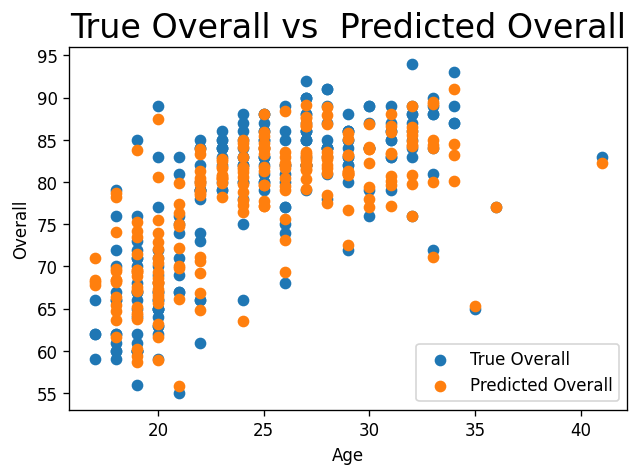

In [195]:
plt.figure(dpi=120)
plt.scatter(X_test["age"],y_test,label = "True Overall")
plt.scatter(X_test["age"],test_pred,label = "Predicted Overall")
plt.title('True Overall vs  Predicted Overall',fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Overall")
plt.legend(loc = 'lower right')

Using Lasso Regression Model

In [196]:
lasso = Lasso(alpha=0.143)
lasso.fit(X_train, y_train)

fifa_20_pred = lasso.predict(X_test)
print("Train MSE: %.3f" %(mean_squared_error(y_train,lasso.predict(X_train))))
print("Val MSE: %.3f" %(mean_squared_error(y_val,lasso.predict(X_val))))
print("Test  MSE: %.3f" %(mean_squared_error(y_test,fifa_20_pred)))

Train MSE: 4.829
Val MSE: 5.071
Test  MSE: 6.915


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 1484.3412815058546, tolerance: 68.8013232906584



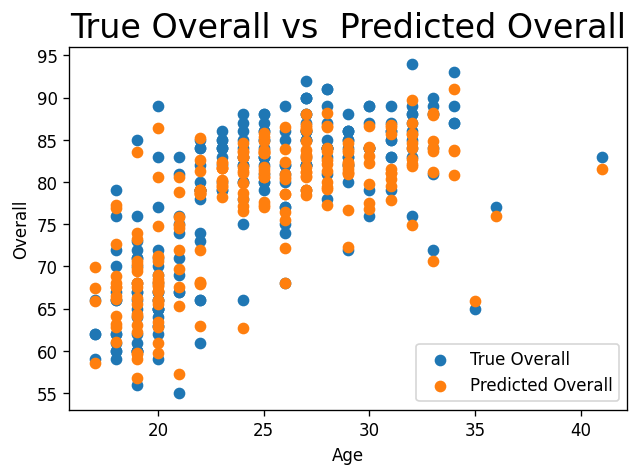

In [197]:
plt.figure(dpi=120)
plt.scatter(X_test["age"],y_test,label = "True Overall")
plt.scatter(X_test["age"],fifa_20_pred,label = "Predicted Overall")
plt.title('True Overall vs  Predicted Overall',fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Overall")
plt.legend(loc = 'lower right')

In [198]:
ridge = Ridge()
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
print("Train MSE: %.3f" %(mean_squared_error(y_train,ridge.predict(X_train))))
print("Val MSE: %.3f" %(mean_squared_error(y_val,ridge.predict(X_val))))
print("Test  MSE: %.3f" %(mean_squared_error(y_test,fifa_20_pred)))

Train MSE: 4.012
Val MSE: 4.260
Test  MSE: 6.915


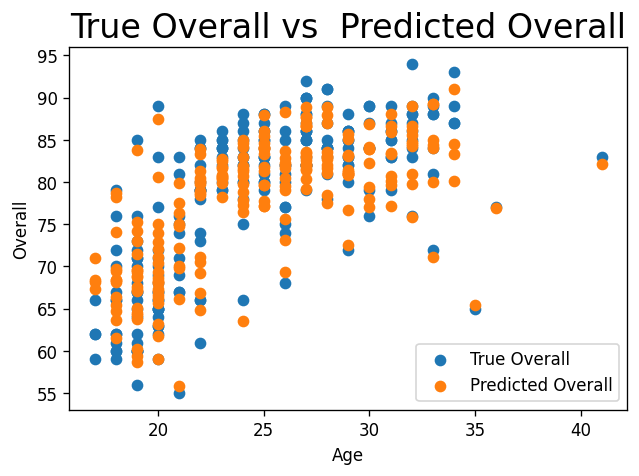

In [199]:
plt.figure(dpi=120)
plt.scatter(X_test["age"],y_test,label = "True Overall")
plt.scatter(X_test["age"],ridge_pred,label = "Predicted Overall")
plt.title('True Overall vs  Predicted Overall',fontsize = 20)
plt.xlabel("Age")
plt.ylabel("Overall")
plt.legend(loc = 'lower right')